In [1]:
import pandas as pd
df = pd.read_csv('Insurance indepth.csv',encoding='latin-1')
df.head()

,Case,Sector
0,Misrepresentation' 'misleading information',Unfair Business Practices
1,Missale' 'Misrepresentation' 'mislead',Unfair Business Practices
2,Insurers 'Unfair Business' Practices 'Missale'...,Unfair Business Practices
3,Misrepresentation' of policy terms and conditi...,Unfair Business Practices
4,Misrepresentation' Policyholders can also file...,Unfair Business Practices


In [2]:
from io import StringIO

In [3]:
df = df[pd.notnull(df['Case'])]

In [4]:
df.shape

(40, 2)

In [5]:
#df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)

In [6]:
df.head()

,Case,Sector
0,Misrepresentation' 'misleading information',Unfair Business Practices
1,Missale' 'Misrepresentation' 'mislead',Unfair Business Practices
2,Insurers 'Unfair Business' Practices 'Missale'...,Unfair Business Practices
3,Misrepresentation' of policy terms and conditi...,Unfair Business Practices
4,Misrepresentation' Policyholders can also file...,Unfair Business Practices


In [7]:
df['category_id'] = df['Sector'].factorize()[0]
category_id_df = df[['Sector','category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','Sector']].values)
df.head()

,Case,Sector,category_id
0,Misrepresentation' 'misleading information',Unfair Business Practices,0
1,Missale' 'Misrepresentation' 'mislead',Unfair Business Practices,0
2,Insurers 'Unfair Business' Practices 'Missale'...,Unfair Business Practices,0
3,Misrepresentation' of policy terms and conditi...,Unfair Business Practices,0
4,Misrepresentation' Policyholders can also file...,Unfair Business Practices,0


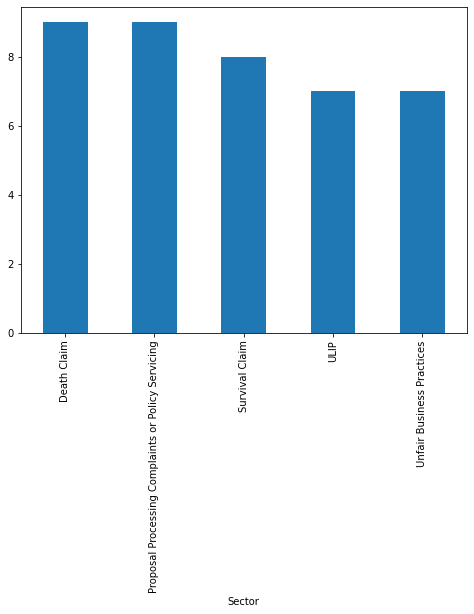

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Sector').Case.count().plot.bar(ylim=0)
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Case).toarray()
labels = df.category_id
features.shape

(40, 97)

In [10]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Sector, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(Sector))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'Death Claim':
  . Most correlated unigrams:
. away
. death
  . Most correlated bigrams:
. insurance company
. life insurance
  . Most correlated trigrams:
. 
# 'Proposal Processing Complaints or Policy Servicing':
  . Most correlated unigrams:
. service
. applicant
  . Most correlated bigrams:
. inconvenience applicant
. insurance company
  . Most correlated trigrams:
. 
# 'Survival Claim':
  . Most correlated unigrams:
. payment
. term
  . Most correlated bigrams:
. insurance company
. payment term
  . Most correlated trigrams:
. 
# 'ULIP':
  . Most correlated unigrams:
. plan
. investment
  . Most correlated bigrams:
. life insurance
. insurance company
  . Most correlated trigrams:
. 
# 'Unfair Business Practices':
  . Most correlated unigrams:
. unfair
. misrepresentation
  . Most correlated bigrams:
. inconvenience applicant
. life insurance
  . Most correlated trigrams:
. 


C:\Users\Vishal Garg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vishal Garg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vishal Garg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vishal Garg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_nam